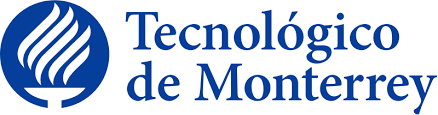

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Proyecto Integrador**
###Tecnológico de Monterrey
###Asesor: Luis Eduardo Falcón Morales
## **Web Scrapping**
###**Equipo 18:**
###**A01793052 - Juan Carlos Lopez Cruz**


# <font color='red'>**Web Scrapping**

Web scraping refers to the extraction of data from a website. This information is collected and then exported into a format that is more useful for the user. Be it a spreadsheet or an API.


## **Website description**:

ConsumerAffairs is a rapidly growing online marketplace where each month millions of consumers research purchases, connect with brands, transact, write reviews and stay up to date on important consumer news.

Brands utilize our software-as-a-service platform to connect with customers, collect reviews and generate sales.

ConsumerAffairs has a creative, driven and fast-paced entrepreneurial environment. We are looking for teammates that want to win, are self-motivated, high performing and who yearn to build something big.

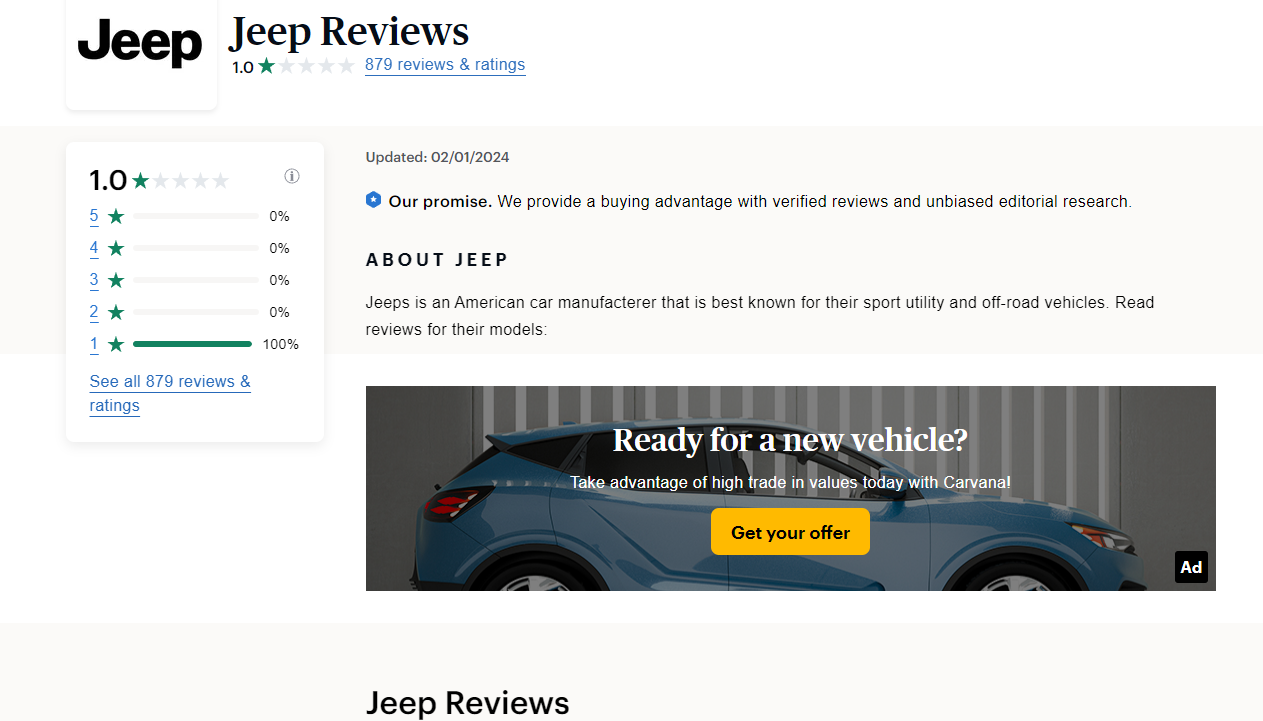

##**Libraries to be used**

In [ ]:
# Data Analysis.
import pandas as pd
import numpy as np

## We Scrapping Libraries
import requests
from bs4 import BeautifulSoup as soup
from random import randint
from time import sleep

## **1-First let's Check if the web site allows to perform Webscrapping and links Generation :**



Prints the status of the HTTP request for each URL, which includes the response status code (like 200 for success, 404 for not found, etc.).

In [ ]:
url1 = 'https://www.consumeraffairs.com/automotive/jeep.htm?page=2#scroll_to_reviews=true' ## Jeep brand 7 pages
url2= 'https://www.consumeraffairs.com/automotive/jeep-cherokee.html?page=2#scroll_to_reviews=true' ## Jeep Cherokee 3 pages
url3= 'https://www.consumeraffairs.com/automotive/jeep-wrangler.html?page=2#scroll_to_reviews=true' ## Jeep Wrangler. 3 pages
url4 = 'https://www.consumeraffairs.com/automotive/jeep-grand-cherokee.html?page=2#scroll_to_reviews=true' ## Jeep gran cherokee 4 pages
urls=[url1,url2,url3,url4]
for url in urls:
    response = requests.get(url, headers={"User-Agent": "Mozilla/5.0 (X11; CrOS x86_64 12871.102.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.141 Safari/537.36"})
    print(f"URL: {url}, Status Code: {response.status_code}")

URL: https://www.consumeraffairs.com/automotive/jeep.htm?page=2#scroll_to_reviews=true, Status Code: 200
URL: https://www.consumeraffairs.com/automotive/jeep-cherokee.html?page=2#scroll_to_reviews=true, Status Code: 200
URL: https://www.consumeraffairs.com/automotive/jeep-wrangler.html?page=2#scroll_to_reviews=true, Status Code: 200
URL: https://www.consumeraffairs.com/automotive/jeep-grand-cherokee.html?page=2#scroll_to_reviews=true, Status Code: 200


Generation of the Links to extract all the comments from website realate to Jeep brand

In [ ]:
links = []
Pages=[7,3,3,4]
urls=[url1,url2,url3,url4]
reviews_x_pages = 1    # The pages are changing 1 by 1.

for i, url in enumerate(urls):
  for k in range(1, Pages[i]+1, reviews_x_pages):
    a = url
    if k == 1:
      a=a.replace("page=2","")     # for the first page there is not page number
    else:
      ss = str(k)  # convertimos a string el valor numérico.
      a=a.replace("2",ss)
    links.append(a)


links

['https://www.consumeraffairs.com/automotive/jeep.htm?#scroll_to_reviews=true',
 'https://www.consumeraffairs.com/automotive/jeep.htm?page=2#scroll_to_reviews=true',
 'https://www.consumeraffairs.com/automotive/jeep.htm?page=3#scroll_to_reviews=true',
 'https://www.consumeraffairs.com/automotive/jeep.htm?page=4#scroll_to_reviews=true',
 'https://www.consumeraffairs.com/automotive/jeep.htm?page=5#scroll_to_reviews=true',
 'https://www.consumeraffairs.com/automotive/jeep.htm?page=6#scroll_to_reviews=true',
 'https://www.consumeraffairs.com/automotive/jeep.htm?page=7#scroll_to_reviews=true',
 'https://www.consumeraffairs.com/automotive/jeep-cherokee.html?#scroll_to_reviews=true',
 'https://www.consumeraffairs.com/automotive/jeep-cherokee.html?page=2#scroll_to_reviews=true',
 'https://www.consumeraffairs.com/automotive/jeep-cherokee.html?page=3#scroll_to_reviews=true',
 'https://www.consumeraffairs.com/automotive/jeep-wrangler.html?#scroll_to_reviews=true',
 'https://www.consumeraffairs.co

## **2- The next step is to extract the comments of the reviewd from each page.**

The following Code extract the data from the Webside.
- The list **review** storages all the comments.
- The list **stars** storages all the rates.

These lists are storage in a data frame **ds**.

In [ ]:
# The following Code is to extract the comments from
#https://www.consumeraffairs.com/automotive/jeep.htm   (7 pages)
#https://www.consumeraffairs.com/automotive/jeep-cherokee.html (3 pages)
#https://www.consumeraffairs.com/automotive/jeep-wrangler.html  (3 pages)
#https://www.consumeraffairs.com/automotive/jeep-grand-cherokee.html  (4 pages)

reviews = [] # This list will include the comments from web scrapping in the first run
review_text= [] # This list that we will use to storage the final comments
stars =[] # This list will storage the raiting.


for link in links:
  print(link)
# This code check the status of the status if there is a response correct.
  headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36' }
  html2 = requests.get(link, headers=headers)
  #print(html2.status_code) ####

  sleep(randint(1,5))   # sleep intervals are included so that calls are not continuously made to the page
                         # and that by detecting this continuous activity, it can be detected as suspicious activity by the server
                         # and can automatically block us for it.
  bsobj1 = soup(html2.content,'lxml')   # BeautifulSoup library object to carry out our task.

  # We extract comments in either of the following two ways:
  # We include some Print just to visualize how the process is carried out:

  # The following code is to extract the text of the comments thad button More shows once the user press click
  reviews2 = [] # This list will storage per page the text of comments that button "More" shows
  for review2 in bsobj1.findAll('div', {'class' : 'js-collapsed rvw__all-text'}): # class that return the text of More button
     # print(review2.text)
      reviews2.append(review2.text.strip())
#####################

  sleep(randint(1,5))
  bsobj2 = soup(html2.content,'lxml')

  i=0 # This variable is to pass the remaining text from buttom More to the comments.
  for review in bsobj2.findAll('div', {'class' : 'rvw__top-text'}): #class tha provide the text form the pages
      if "      More" in review.text: # If the comment has the button More
        review_text =review.text.replace("                                  More", reviews2[i]) #The remaing text replace the More word in the comment
        i=i+1 # This will increase until the final remaining text per comment.
      else: # if the comments does not have the button More just extract the text.
        review_text=review.text
      #print(review_text)
      reviews.append(review_text.strip()) #Storage all in the list reviews

  sleep(randint(1,5))
  bsobj3 = soup(html2.content,'lxml')

   # Let's also extract the ratings (stars):
   # In particular in this case we will extract the entire string where the
   # rating of the hotel by the user and from there through regex you can
   # Easily perform rating extraction:
  for cal in bsobj3.findAll('div', {'class' : 'rvw__hdr-stat'}):
    cal= cal.find("div")["class"][2]
    cal=int(cal[-1])
    stars.append(cal)
  if len(reviews) != len(stars):
        diff = abs(len(reviews) - len(stars))
        if len(reviews) > len(stars):
          stars.extend([np.nan] * diff) ### add nan in the comments no rated.
  #print(stars)
  data = {
        'Review': reviews,
        'Stars': stars
    }
  ds=pd.DataFrame(data)


https://www.consumeraffairs.com/automotive/jeep.htm?#scroll_to_reviews=true
https://www.consumeraffairs.com/automotive/jeep.htm?page=2#scroll_to_reviews=true
https://www.consumeraffairs.com/automotive/jeep.htm?page=3#scroll_to_reviews=true
https://www.consumeraffairs.com/automotive/jeep.htm?page=4#scroll_to_reviews=true
https://www.consumeraffairs.com/automotive/jeep.htm?page=5#scroll_to_reviews=true
https://www.consumeraffairs.com/automotive/jeep.htm?page=6#scroll_to_reviews=true
https://www.consumeraffairs.com/automotive/jeep.htm?page=7#scroll_to_reviews=true
https://www.consumeraffairs.com/automotive/jeep-cherokee.html?#scroll_to_reviews=true
https://www.consumeraffairs.com/automotive/jeep-cherokee.html?page=2#scroll_to_reviews=true
https://www.consumeraffairs.com/automotive/jeep-cherokee.html?page=3#scroll_to_reviews=true
https://www.consumeraffairs.com/automotive/jeep-wrangler.html?#scroll_to_reviews=true
https://www.consumeraffairs.com/automotive/jeep-wrangler.html?page=2#scroll_

Let's check the data frame **ds** content.

In [ ]:
ds

,Review,Stars
0,Everything with them is 24 to 48 hours and eve...,1.0
1,So I went in to replace the hose radiator outl...,1.0
2,I was so excited to buy a Jeep but turns out i...,1.0
3,The 2015 Jeep Wrangler Willy I purchased is a ...,1.0
4,I’m a mail carrier from the Dakotas.. so I pur...,1.0
...,...,...
1658,After reading about sudden accelerations in Je...,NaN
1659,My 2002 Jeep Grand Cherokee Limited takes off ...,NaN
1660,As I was braking at a stoplight my 2000 Jeep G...,NaN
1661,About 1 1/2 months ago my wife complained to m...,NaN


## **3-Storage data scrapped from the Webside in a csv file**

Let's convert the data frame **ds** to csv file and then download to storage file in a github.

In [ ]:
ds.to_csv('Jeep_comments.csv', index=False,encoding = 'utf8')
files.download('Jeep_comments.csv')

# **References:**

- ParseHub. (n.d.). What Is Web Scraping? | ParseHub. ParseHub. Retrieved January 28, 2024, from https://www.parsehub.com/blog/what-is-web-scraping/
